In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('database_IND.csv')

# Handle missing values (if any)
df.fillna(0, inplace=True)



In [11]:
df.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,0,0,...,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0,0.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0,0,...,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0,0.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0,0,...,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0,0.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,0,0,...,2019.0,0.0,617.789264,843.747,886.004428,663.774500,626.239128,0.0,Central Electricity Authority,0.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,0,...,2019.0,0.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0.0,Central Electricity Authority,0.0


In [12]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,907.000000,907.000000,907.0,907.000000,907.0,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.0
mean,326.223755,20.122831,73.536147,0.0,1160.382580,0.0,1155.304300,0.0,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911,0.0,0.0
std,590.085456,7.655960,17.674358,0.0,985.973139,0.0,999.466215,0.0,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,16.725000,16.172050,73.811550,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,59.200000,21.281800,76.493800,0.0,1978.000000,0.0,2019.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,385.250000,25.176450,79.206100,0.0,2003.000000,0.0,2019.000000,0.0,556.562750,598.926350,670.039394,709.290725,687.754000,0.0,0.0
max,4760.000000,34.649000,95.408000,0.0,2018.000000,0.0,2019.000000,0.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,0.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  907 non-null    float64
 6   longitude                 907 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               907 non-null    object 
 9   other_fuel2               907 non-null    object 
 10  other_fuel3               907 non-null    float64
 11  commissioning_year        907 non-null    float64
 12  owner                     907 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [14]:
selected_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'estimated_generation_gwh'
]

In [15]:
len(selected_column)

16

In [16]:
global_power_plant_df = df[selected_column].copy()

In [18]:
global_power_plant_df

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,IND,India,ACME Solar Tower,2.5,Solar,0,0,0.0,2011.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,IND,India,ADITYA CEMENT WORKS,98.0,Coal,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,IND,India,AES Saurashtra Windfarms,39.2,Wind,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,IND,India,AGARTALA GT,135.0,Gas,0,0,0.0,2004.0,2019.0,0.0,617.789264,843.747000,886.004428,663.774500,0.0
4,IND,India,AKALTARA TPP,1800.0,Coal,Oil,0,0.0,2015.0,2019.0,0.0,3035.550000,5916.370000,6243.000000,5385.579736,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,1600.0,Coal,Oil,0,0.0,2016.0,2019.0,0.0,0.000000,0.994875,233.596650,865.400000,0.0
903,IND,India,Yelesandra Solar Power Plant,3.0,Solar,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
904,IND,India,Yelisirur wind power project,25.5,Wind,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
905,IND,India,ZAWAR MINES,80.0,Coal,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [19]:
global_power_plant_df.sample(5)

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
515,IND,India,NAGOTHANE COMPLEX,78.9,Oil,0,0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.00000,0.0
131,IND,India,Boha Solar Power Plant,4.2,Solar,0,0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.00000,0.0
77,IND,India,BHADRAVATI MILL,41.0,Coal,0,0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.00000,0.0
66,IND,India,BASSI,66.0,Hydro,0,0,0.0,1973.0,2019.0,0.0,293.53495,314.3205,296.2712,313.59415,0.0
252,IND,India,Gwal Pahari Solar Power Plant,3.0,Solar,0,0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.00000,0.0


In [20]:
global_power_plant_df.describe()

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,907.000000,907.0,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.0
mean,326.223755,0.0,1160.382580,1155.304300,0.0,1067.106713,1129.781446,1180.909147,1235.958207,0.0
std,590.085456,0.0,985.973139,999.466215,0.0,2926.078576,3105.552487,3131.100641,3187.208175,0.0
min,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,16.725000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,59.200000,0.0,1978.000000,2019.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,385.250000,0.0,2003.000000,2019.000000,0.0,556.562750,598.926350,670.039394,709.290725,0.0
max,4760.000000,0.0,2018.000000,2019.000000,0.0,28127.000000,30539.000000,30015.000000,35116.000000,0.0


In [21]:
global_power_plant_df[global_power_plant_df.generation_gwh_2013 == -947.6000000]

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh


In [22]:
#Exploratory Analysis and Visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
global_power_plant_df.country_long.nunique()

1

In [24]:
countries_plant = global_power_plant_df.country_long.value_counts().head(20)
countries_plant

India    907
Name: country_long, dtype: int64

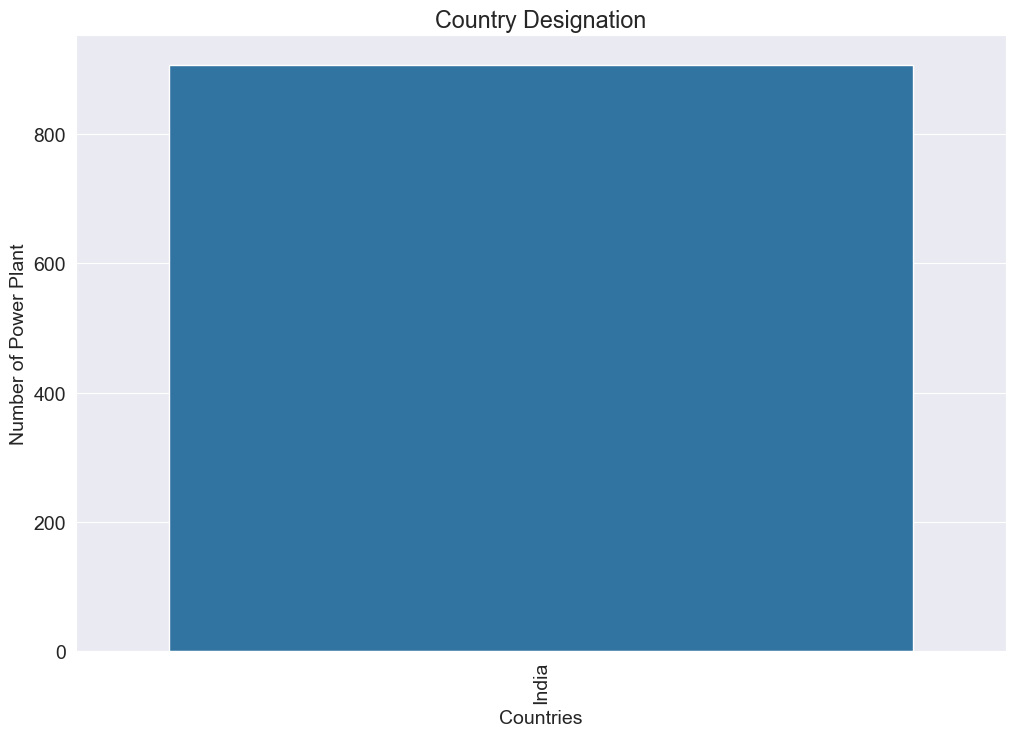

In [25]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

In [26]:
main_primary_fuel = global_power_plant_df.primary_fuel.value_counts() * 100 / global_power_plant_df.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

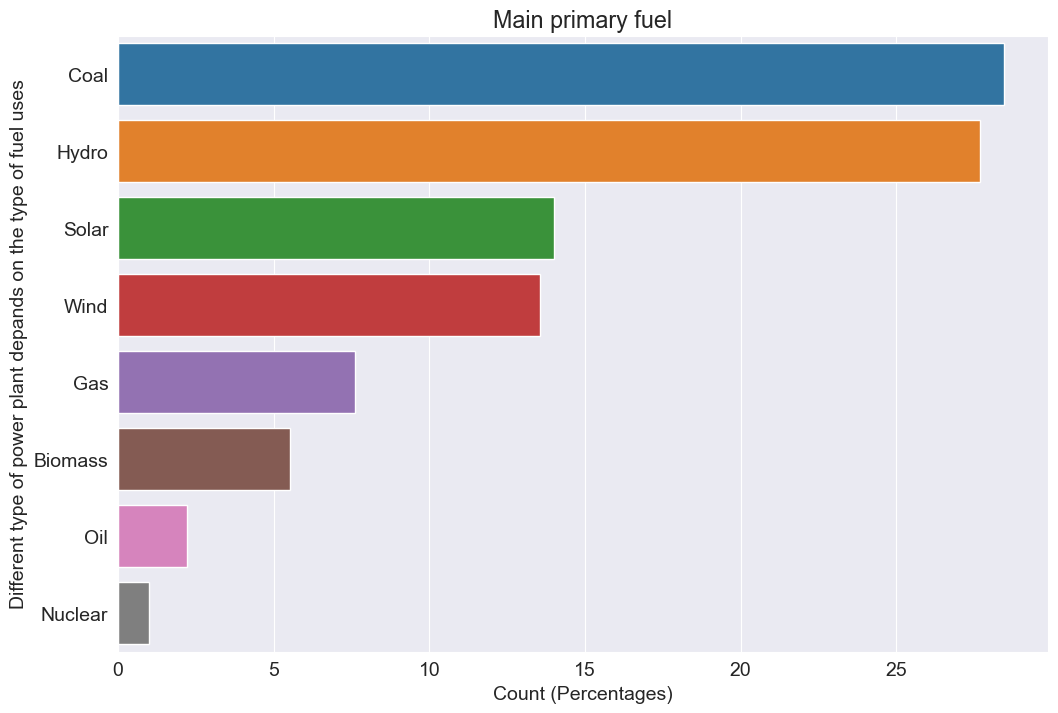

In [27]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

Mean Squared Error for 'capacity_mw' prediction: 294650.41


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


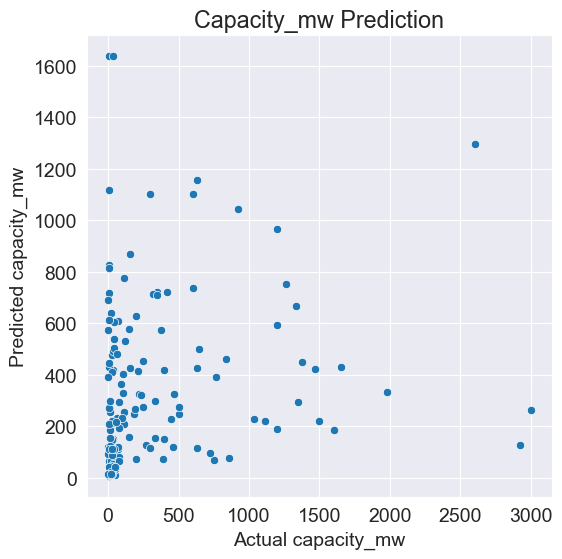

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
#data_url = "https://github.com/wri/global-power-plant-database/raw/master/source_databases_csv/database_IND.csv"
df = pd.read_csv("database_IND.csv")

# Data preprocessing
# Drop rows with missing values in the columns of interest
df = df.dropna(subset=['capacity_mw', 'latitude', 'longitude'])

# Define the features and target variables
X = df[['latitude', 'longitude']]
y_capacity_mw = df['capacity_mw']

# Split the data into training and testing sets
X_train, X_test, y_train_capacity_mw, y_test_capacity_mw = train_test_split(X, y_capacity_mw, test_size=0.2, random_state=42)

# Train a regressor for predicting "capacity_mw"
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train_capacity_mw)

# Make predictions for "capacity_mw"
y_pred_capacity_mw = reg.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test_capacity_mw, y_pred_capacity_mw)
print(f"Mean Squared Error for 'capacity_mw' prediction: {mse:.2f}")

# Visualizations
plt.figure(figsize=(6, 6))

# For "capacity_mw" prediction
sns.scatterplot(y_test_capacity_mw, y_pred_capacity_mw)
plt.xlabel("Actual capacity_mw")
plt.ylabel("Predicted capacity_mw")
plt.title("Capacity_mw Prediction")

plt.show()


In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data_url = "https://github.com/wri/global-power-plant-database/raw/master/source_databases_csv/database_IND.csv"
df = pd.read_csv(data_url)

# Data preprocessing
# Fill missing values with the mean of the respective columns
imputer = SimpleImputer(strategy="mean")
df[['latitude', 'longitude', 'capacity_mw']] = imputer.fit_transform(df[['latitude', 'longitude', 'capacity_mw']])

# Remove rows with missing "primary_fuel" values
df = df.dropna(subset=['primary_fuel'])

# Define the features and target variable
X = df[['latitude', 'longitude', 'capacity_mw']]
y = df['primary_fuel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier for predicting "Primary Fuel"
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

# Make predictions for "Primary Fuel"
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for 'Primary Fuel' prediction: {accuracy:.2f}")

# Display a classification report
print(classification_report(y_test, y_pred))


Accuracy for 'Primary Fuel' prediction: 0.42
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         5
        Coal       0.58      0.58      0.58        48
         Gas       0.00      0.00      0.00        18
       Hydro       0.37      0.59      0.45        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         6
       Solar       0.44      0.44      0.44        16
        Wind       0.32      0.29      0.30        28

    accuracy                           0.42       182
   macro avg       0.21      0.24      0.22       182
weighted avg       0.36      0.42      0.38       182



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy for 'Primary Fuel' prediction: 0.42
              precision    recall  f1-score   support

     Biomass       0.00      0.00      0.00         5
        Coal       0.58      0.58      0.58        48
         Gas       0.00      0.00      0.00        18
       Hydro       0.37      0.59      0.45        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         6
       Solar       0.44      0.44      0.44        16
        Wind       0.32      0.29      0.30        28

    accuracy                           0.42       182
   macro avg       0.21      0.24      0.22       182
weighted avg       0.36      0.42      0.38       182



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


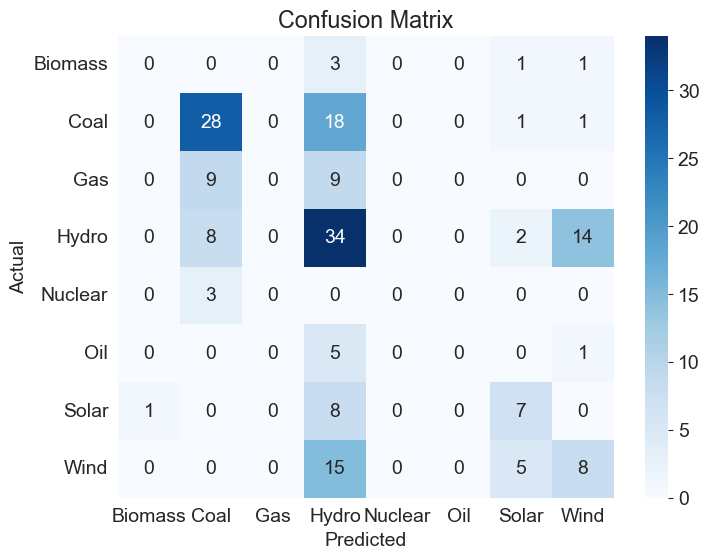

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


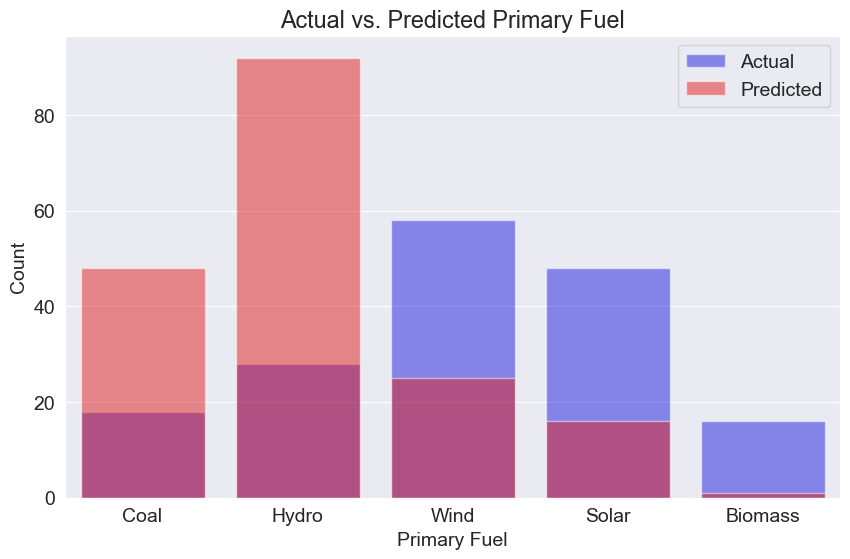

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_url = "https://github.com/wri/global-power-plant-database/raw/master/source_databases_csv/database_IND.csv"
df = pd.read_csv(data_url)

# Data preprocessing
# Fill missing values with the mean of the respective columns
imputer = SimpleImputer(strategy="mean")
df[['latitude', 'longitude', 'capacity_mw']] = imputer.fit_transform(df[['latitude', 'longitude', 'capacity_mw']])

# Remove rows with missing "primary_fuel" values
df = df.dropna(subset=['primary_fuel'])

# Define the features and target variable
X = df[['latitude', 'longitude', 'capacity_mw']]
y = df['primary_fuel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier for predicting "Primary Fuel"
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

# Make predictions for "Primary Fuel"
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for 'Primary Fuel' prediction: {accuracy:.2f}")

# Display a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a bar chart for actual vs. predicted "Primary Fuel"
plt.figure(figsize=(10, 6))
sns.countplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.countplot(y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Primary Fuel')
plt.legend()
plt.show()
